In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Step 2: Preprocess the data
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize the images
x_train = x_train.reshape(-1, 28, 28, 1)  # Add channel dimension
x_test = x_test.reshape(-1, 28, 28, 1)

# Step 3: Define the CNN model
inputs = tf.keras.Input(shape=(28, 28, 1), name="input_layer")  # Explicit input layer

x = layers.Conv2D(32, (3, 3), activation='relu', name="conv_1")(inputs)
x = layers.MaxPooling2D((2, 2), name="pool_1")(x)
x = layers.Conv2D(64, (3, 3), activation='relu', name="conv_2")(x)
x = layers.MaxPooling2D((2, 2), name="pool_2")(x)
x = layers.Flatten(name="flatten")(x)
x = layers.Dense(64, activation='relu', name="dense_1")(x)
outputs = layers.Dense(10, activation='softmax', name="output")(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs, name="mnist_cnn")

# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Call the model explicitly to ensure it is initialized
_ = model.predict(x_train[:1])  # Run a sample input through the model

# Display the model summary
model.summary()

# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Model: "mnist_cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_1 (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pool_1 (MaxPooling2D)                │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_2 (Conv2D)                      │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pool_2 (MaxPooling2D)                │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.8724 - loss: 0.3910 - val_accuracy: 0.9787 - val_loss: 0.0735
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.9834 - loss: 0.0545 - val_accuracy: 0.9867 - val_loss: 0.0467
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9885 - loss: 0.0364 - val_accuracy: 0.9850 - val_loss: 0.0485
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9923 - loss: 0.0246 - val_accuracy: 0.9890 - val_loss: 0.0389
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9933 - loss: 0.0188 - val_accuracy: 0.9895 - val_loss: 0.0358


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


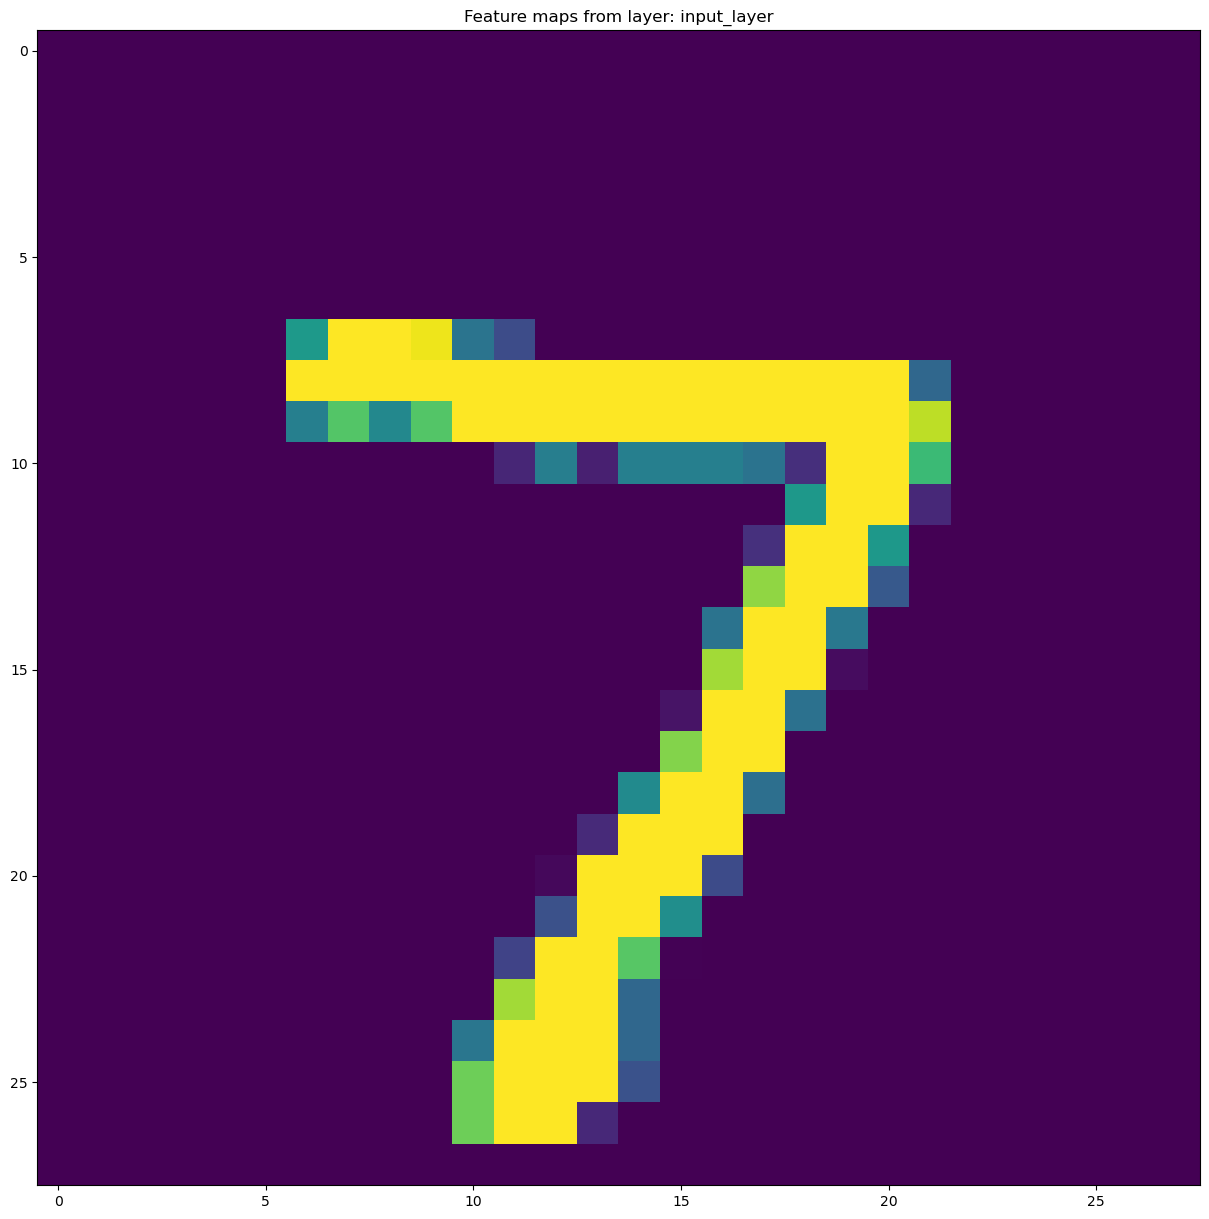

C:\Users\71591\AppData\Local\Temp\ipykernel_24984\3243534440.py:20: RuntimeWarning: invalid value encountered in divide
  feature_map /= feature_map.std()
C:\Users\71591\AppData\Local\Temp\ipykernel_24984\3243534440.py:23: RuntimeWarning: invalid value encountered in cast
  feature_map = np.clip(feature_map, 0, 255).astype('uint8')  # Clip to valid image range


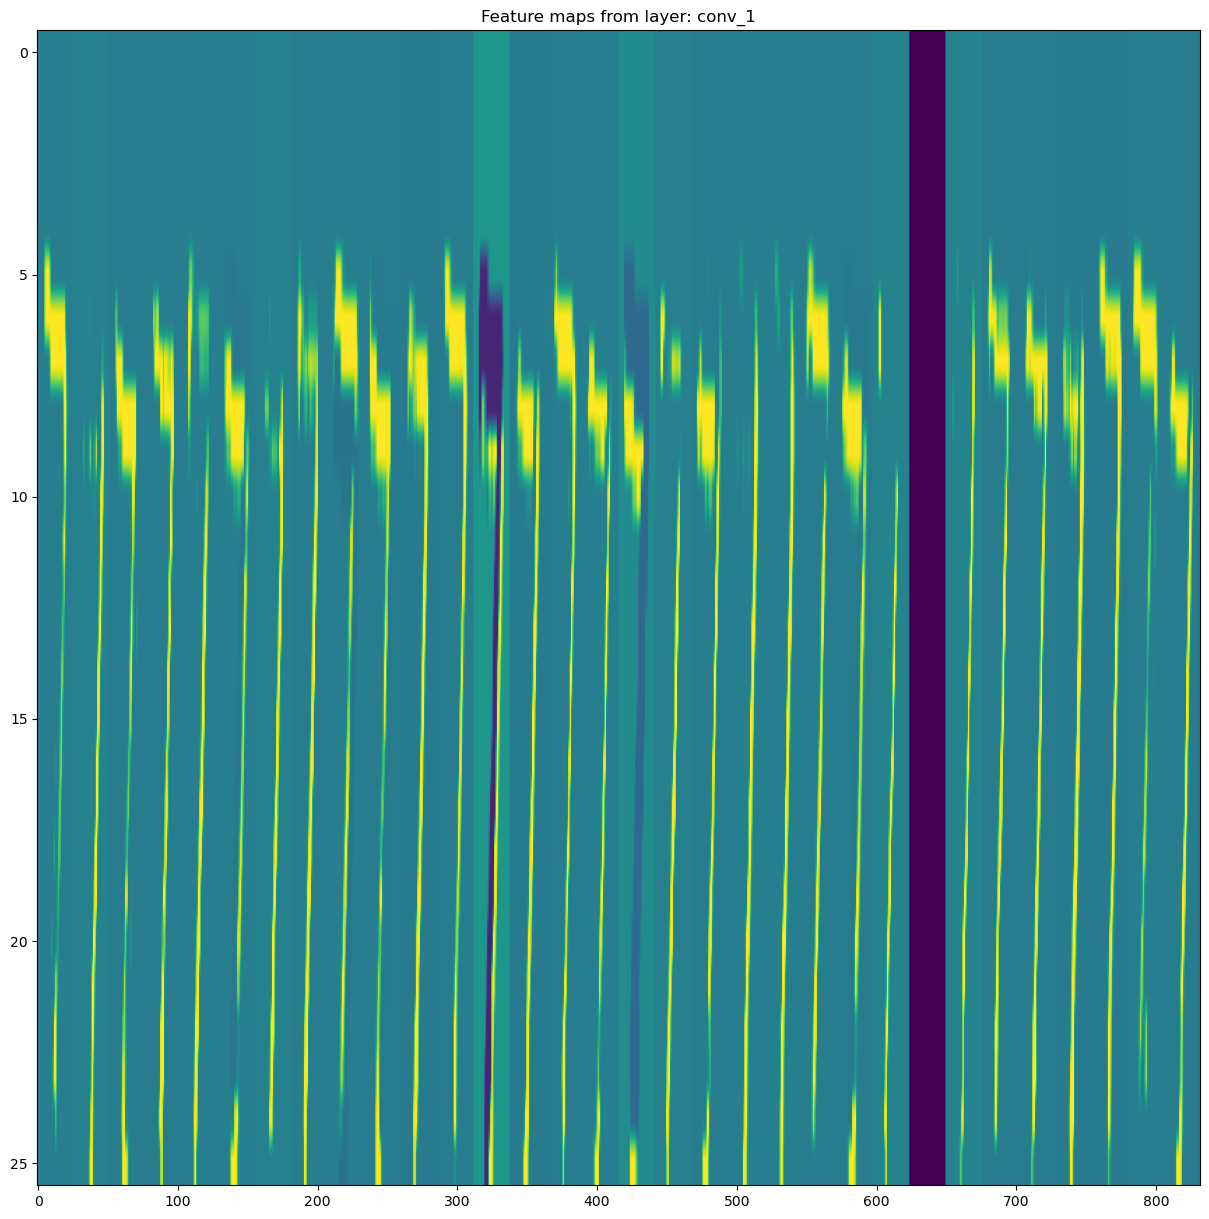

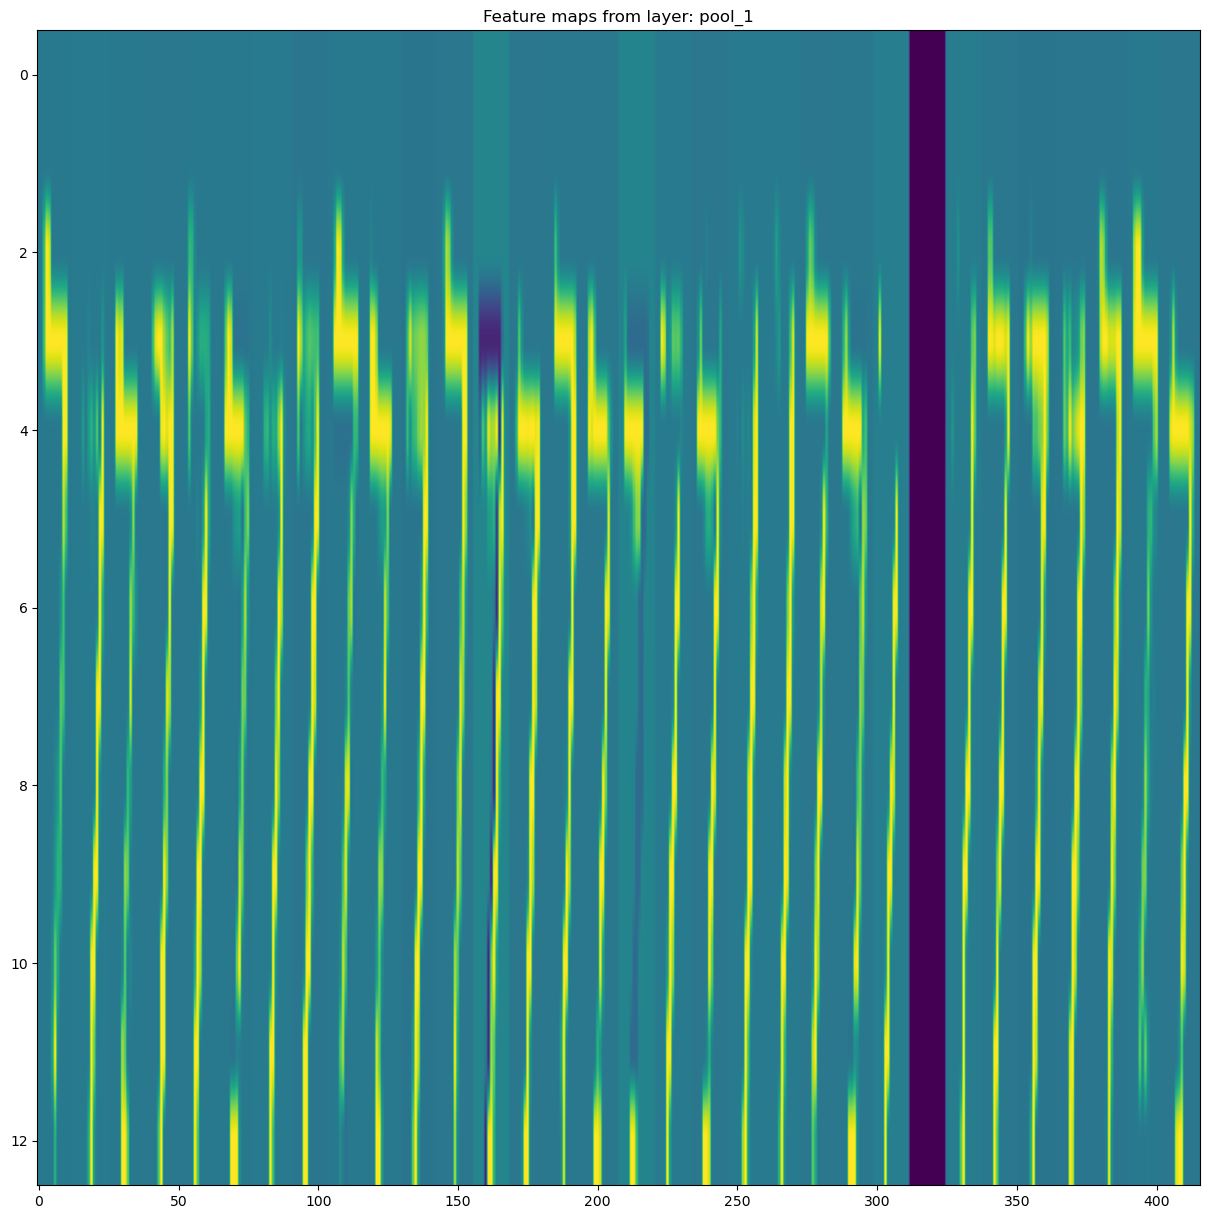

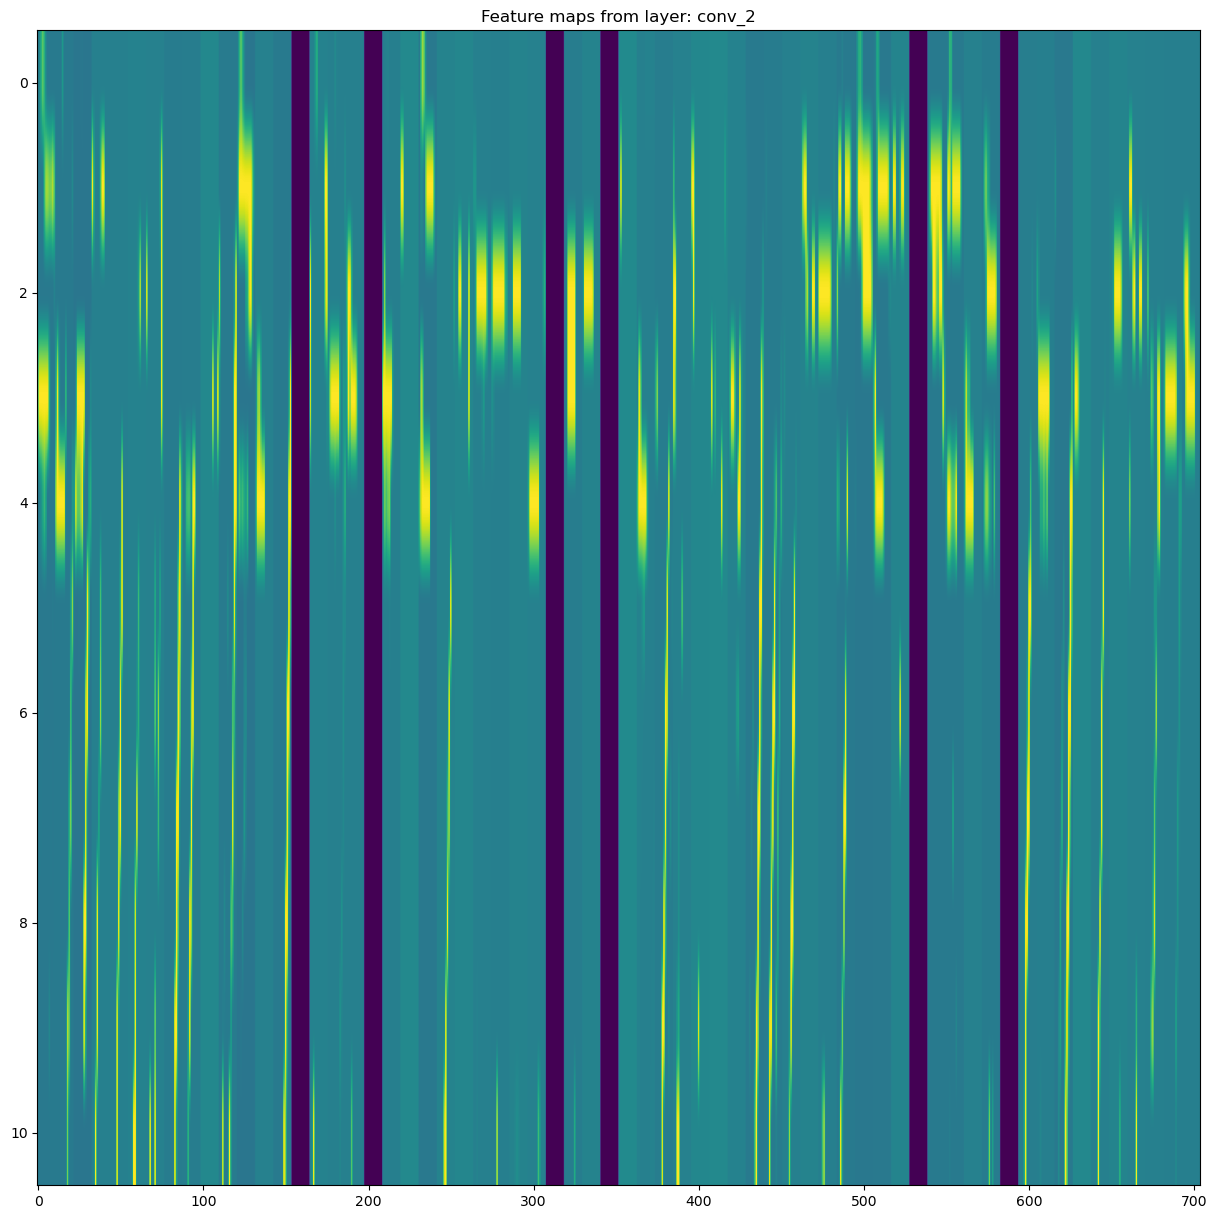

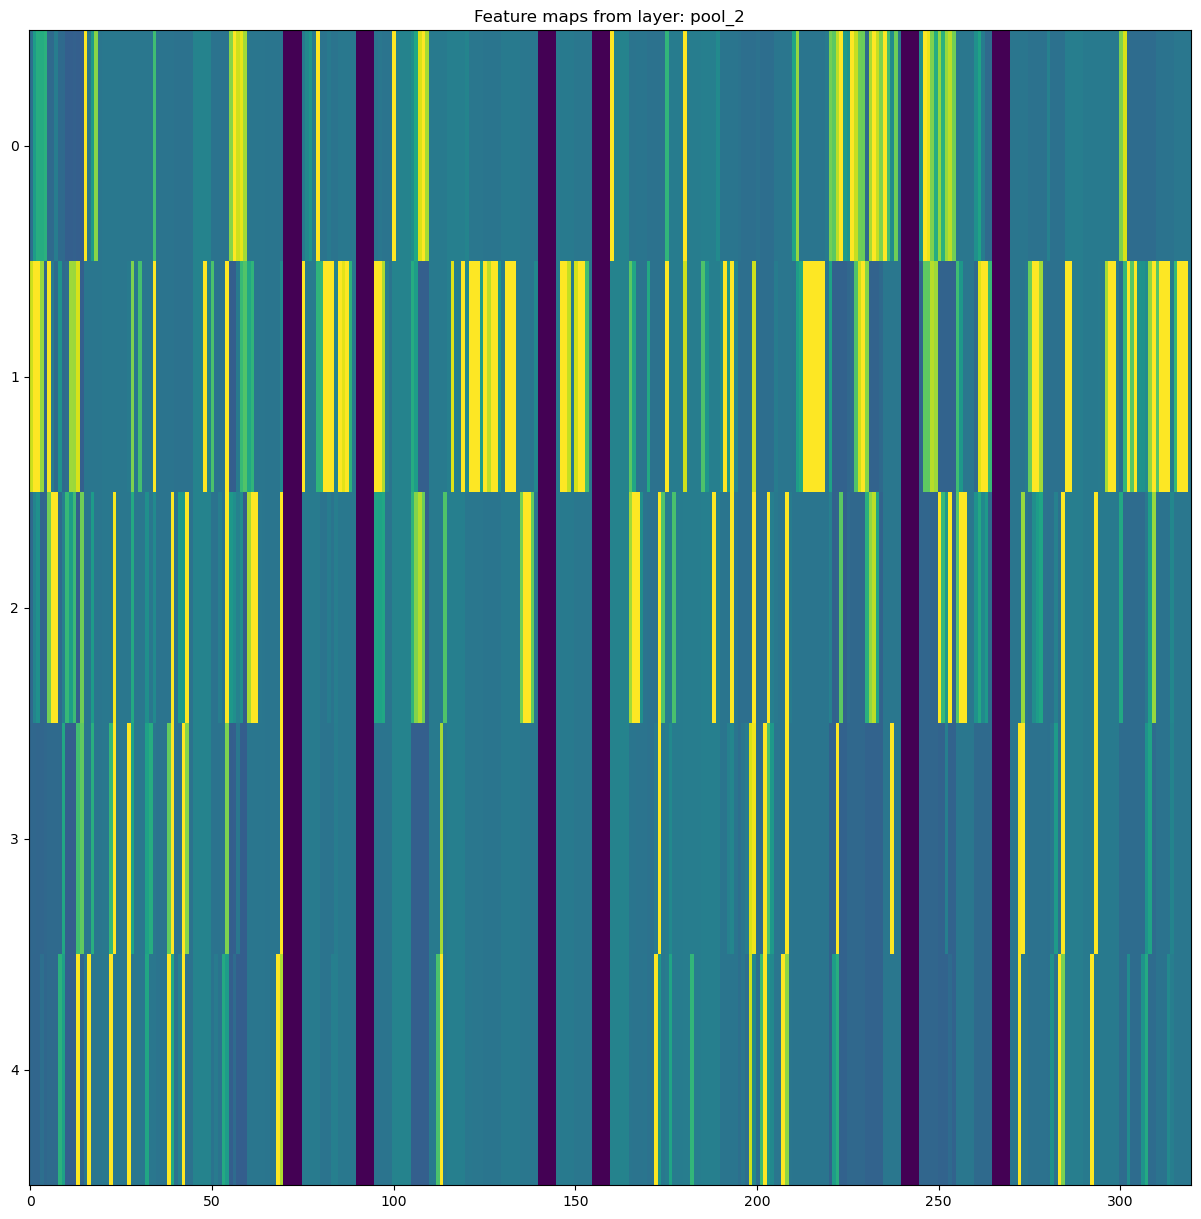

Layer flatten output shape: (1, 1600)
Layer dense_1 output shape: (1, 64)


In [13]:
# Step 4: Create a model to output intermediate layers
layer_outputs = [layer.output for layer in model.layers[:-1]]  # Exclude the final softmax layer
activation_model = tf.keras.Model(inputs=model.input, outputs=layer_outputs)

# Step 5: Get activations for a test image
test_image = x_test[0:1]  # Pick a single test image
activations = activation_model.predict(test_image)

# Step 6: Visualize the feature maps
for layer_name, layer_activation in zip([layer.name for layer in model.layers], activations):
    if len(layer_activation.shape) == 4:  # If the output is a feature map
        num_filters = layer_activation.shape[-1]  # Number of filters
        size = layer_activation.shape[1]  # Spatial size (height/width)
        display_grid = np.zeros((size, size * num_filters))  # Grid to display feature maps

        # Fill the display grid with feature maps
        for i in range(num_filters):
            feature_map = layer_activation[0, :, :, i]  # Extract single feature map
            feature_map -= feature_map.mean()  # Normalize for better visualization
            feature_map /= feature_map.std()
            feature_map *= 64
            feature_map += 128
            feature_map = np.clip(feature_map, 0, 255).astype('uint8')  # Clip to valid image range
            display_grid[:, i * size: (i + 1) * size] = feature_map  # Place in grid

        # Plot the feature maps
        plt.figure(figsize=(15, 15))
        plt.title(f"Feature maps from layer: {layer_name}")
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')
        plt.show()
    else:
        print(f"Layer {layer_name} output shape: {layer_activation.shape}")

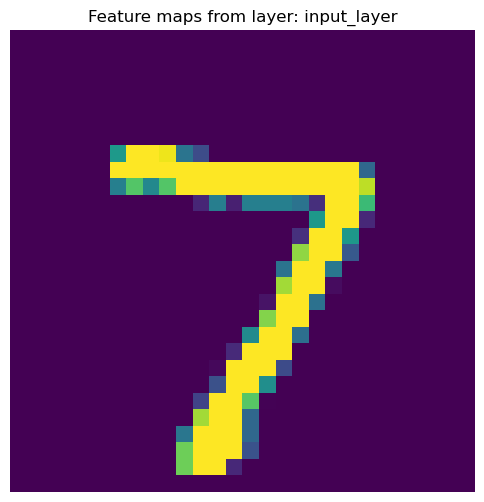

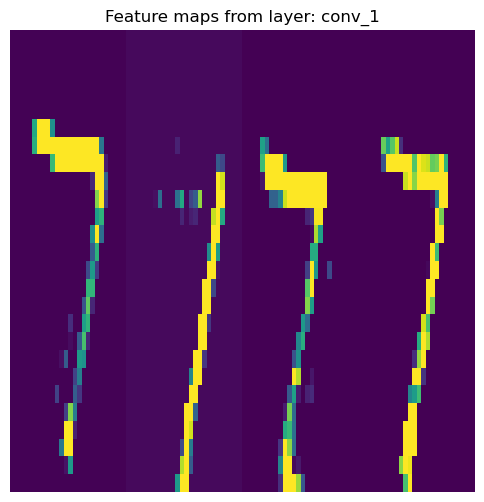

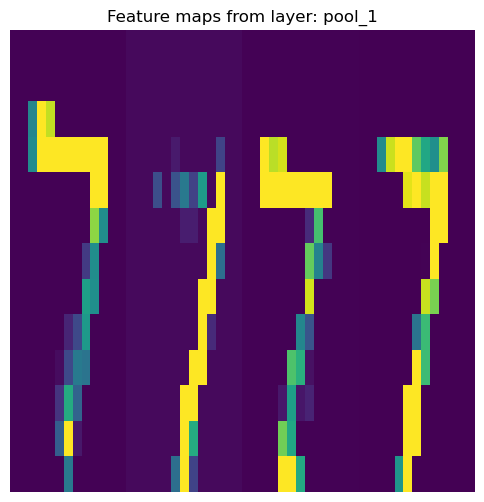

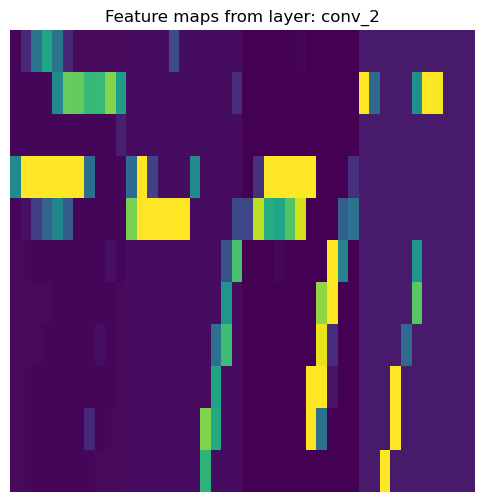

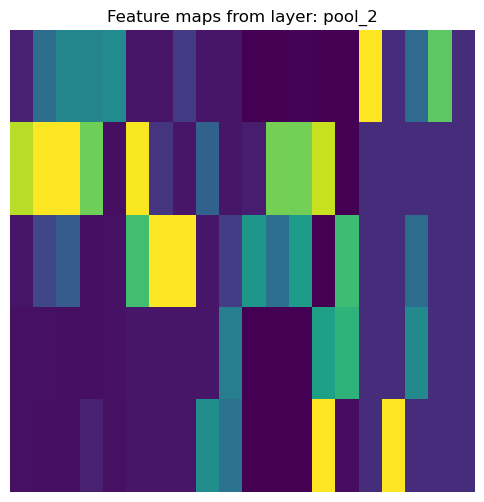

Layer flatten output shape: (1, 1600)
Layer dense_1 output shape: (1, 64)


In [15]:
# Step 6: Visualize the feature maps with compact output
for layer_name, layer_activation in zip([layer.name for layer in model.layers], activations):
    if len(layer_activation.shape) == 4:  # If the output is a feature map
        num_filters = layer_activation.shape[-1]  # Number of filters
        size = layer_activation.shape[1]  # Spatial size (height/width)

        # Limit the number of filters to display
        filters_to_show = min(num_filters, 4)  # Show only 4 filters to keep the visualization small
        display_grid = np.zeros((size, size * filters_to_show))

        # Prepare the grid for visualization
        for i in range(filters_to_show):
            feature_map = layer_activation[0, :, :, i]  # Extract single feature map
            feature_map -= feature_map.mean()  # Normalize for better visualization
            feature_map /= (feature_map.std() + 1e-6)  # Avoid divide-by-zero errors
            feature_map *= 64
            feature_map += 128
            feature_map = np.clip(feature_map, 0, 255).astype('uint8')  # Clip to valid image range
            display_grid[:, i * size: (i + 1) * size] = feature_map  # Place in grid

        # Plot the feature maps with reduced figure size
        plt.figure(figsize=(6, 6))  # Compact figure size
        plt.title(f"Feature maps from layer: {layer_name}")
        plt.axis('off')  # Hide axes for a cleaner look
        plt.imshow(display_grid, aspect='auto', cmap='viridis')
        plt.show()
    else:
        print(f"Layer {layer_name} output shape: {layer_activation.shape}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Visualizing filters and outputs for layer: conv_1


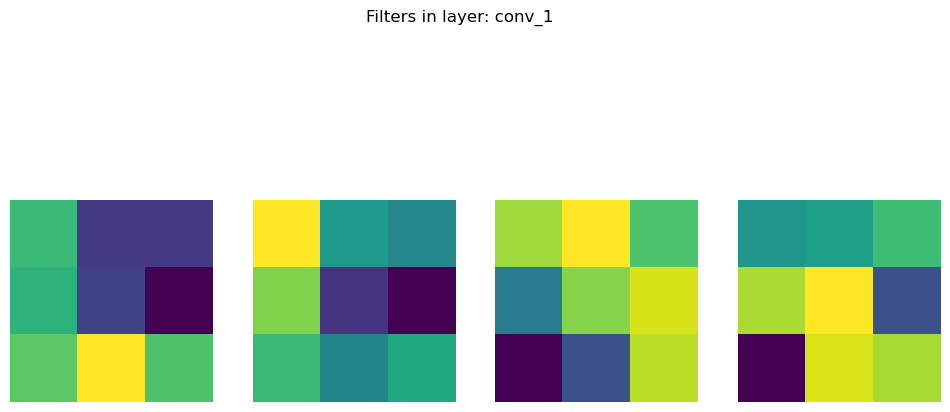

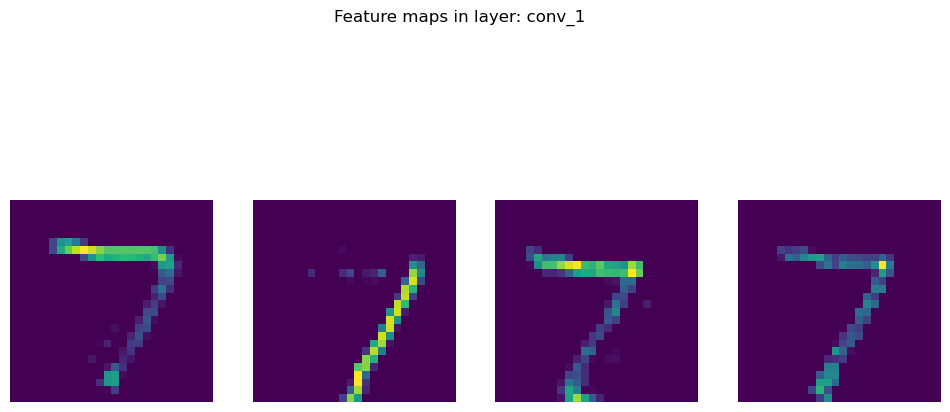

Visualizing filters and outputs for layer: conv_2


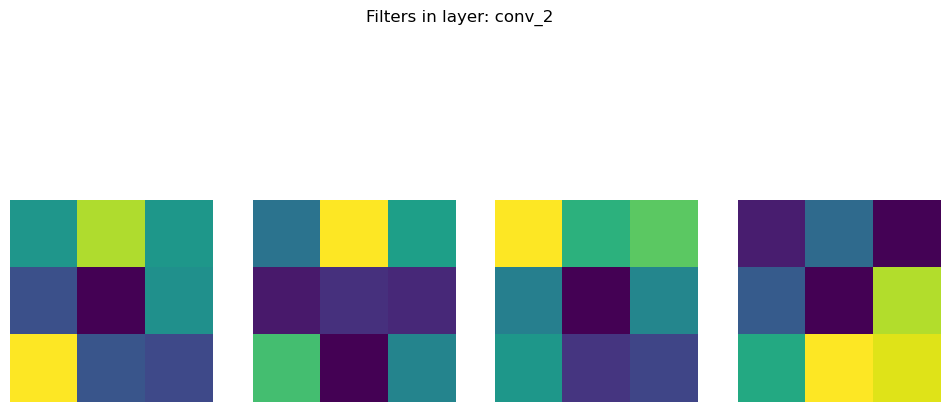

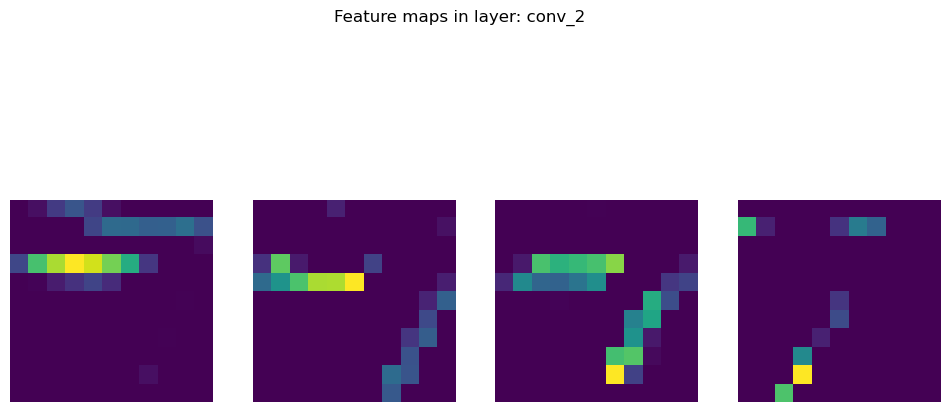

In [22]:
# Step 1: Define the input image
test_image = x_test[0:1]  # Use the first image from the test set

# Step 2: Create a model to output activations for all layers
layer_outputs = [layer.output for layer in model.layers]  # All layer outputs
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

# Step 3: Get activations for the test image
activations = activation_model.predict(test_image)

# Step 4: Visualize filters and activations for each Conv2D layer
for layer in model.layers:
    if isinstance(layer, layers.Conv2D):  # Check if the layer is a Conv2D layer
        print(f"Visualizing filters and outputs for layer: {layer.name}")

        # **Visualize Filters (Learned Weights)**
        filters, biases = layer.get_weights()  # Extract filters and biases
        filters = (filters - filters.min()) / (filters.max() - filters.min())  # Normalize filters

        n_filters = filters.shape[-1]  # Number of filters
        plt.figure(figsize=(12, 6))
        for i in range(min(n_filters, 4)):  # Show only the first 4 filters
            plt.subplot(1, 4, i + 1)
            plt.imshow(filters[:, :, 0, i], cmap='viridis')  # Visualize the first channel
            plt.axis('off')
        plt.suptitle(f"Filters in layer: {layer.name}")
        plt.show()

        # **Visualize Outputs (Feature Maps)**
        activation = activations[model.layers.index(layer)]  # Get activation for this layer
        n_feature_maps = activation.shape[-1]  # Number of feature maps
        plt.figure(figsize=(12, 6))
        for i in range(min(n_feature_maps, 4)):  # Show only the first 4 feature maps
            plt.subplot(1, 4, i + 1)
            plt.imshow(activation[0, :, :, i], cmap='viridis')
            plt.axis('off')
        plt.suptitle(f"Feature maps in layer: {layer.name}")
        plt.show()


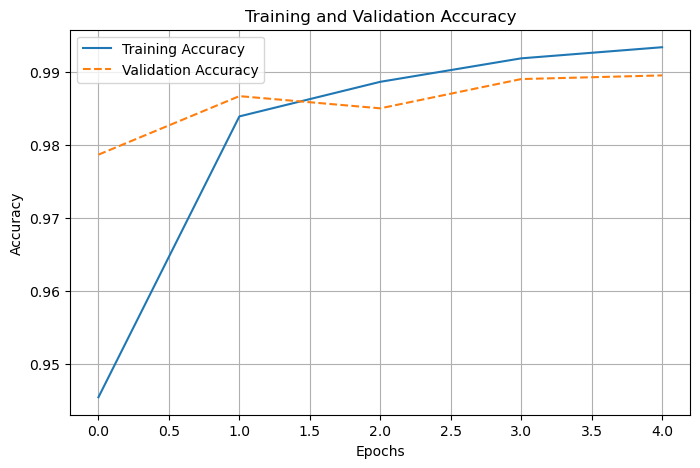

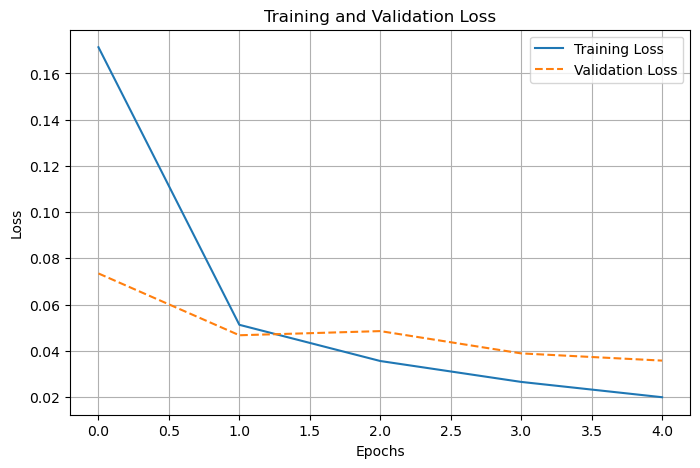

In [16]:
# Extract accuracy and loss values from the training history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot Accuracy
plt.figure(figsize=(8, 5))
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy', linestyle='--')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.figure(figsize=(8, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss', linestyle='--')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


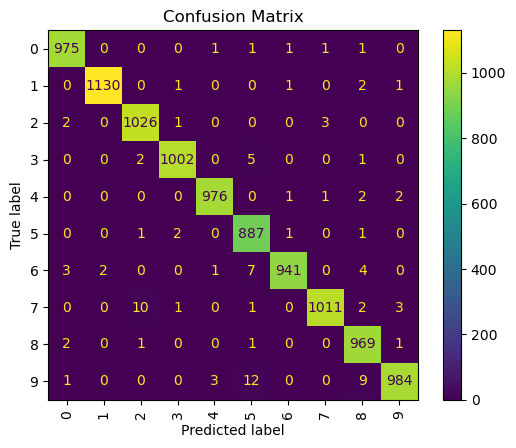

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions for the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap='viridis', xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()


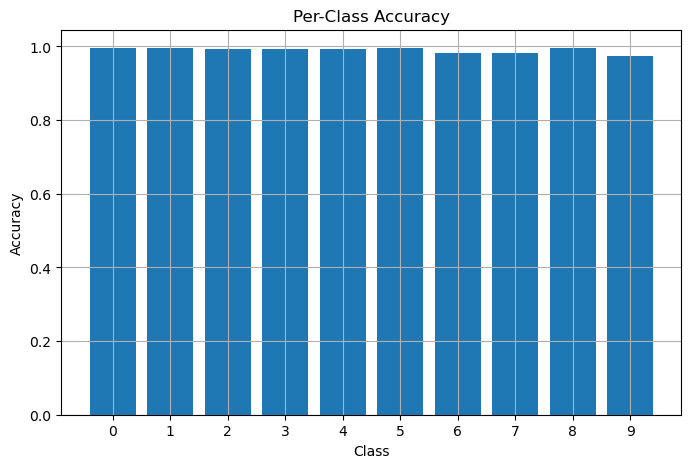

In [19]:
class_accuracies = cm.diagonal() / cm.sum(axis=1)
plt.figure(figsize=(8, 5))
plt.bar(range(10), class_accuracies)
plt.title("Per-Class Accuracy")
plt.xlabel("Class")
plt.ylabel("Accuracy")
plt.xticks(range(10))
plt.grid(True)
plt.show()


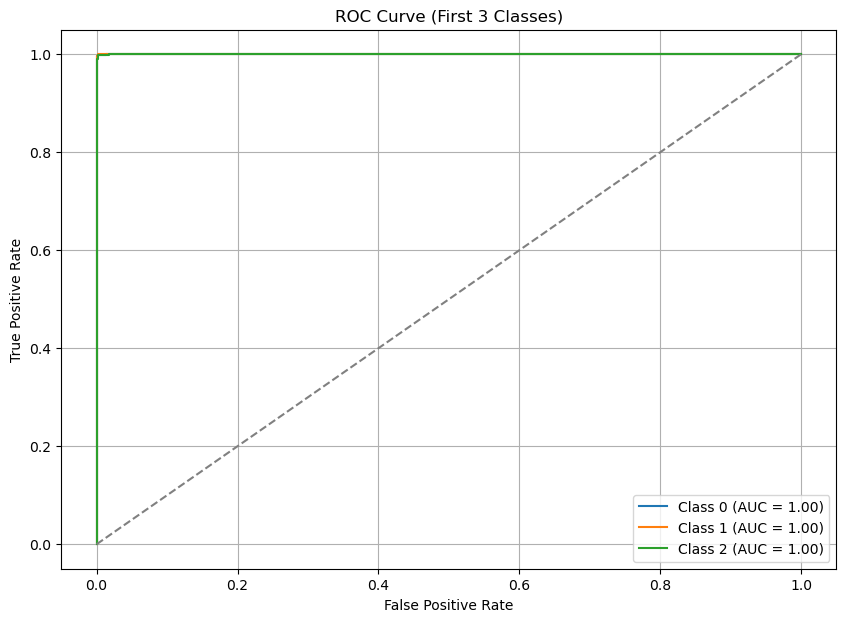

In [23]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize labels for ROC computation
y_test_binarized = label_binarize(y_test, classes=range(10))
fpr = {}
tpr = {}
roc_auc = {}

for i in range(10):  # Compute ROC for each class
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for the first few classes
plt.figure(figsize=(10, 7))
for i in range(3):  # Plot for first 3 classes
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (First 3 Classes)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
